# Imports

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

working_path = "/content/drive/My Drive/data_science_basics/data_for_data_visualization_course/"
!dir "/content/drive/My Drive/data_science_basics/data_for_data_visualization_course/"

print('Setup completed')

cancer_b.csv	      fifa_ranking.csv	 iris_setosa.csv
cancer_m.csv	      flight_delays.csv  iris_versicolor.csv
candy.csv	      ign_scores.csv	 iris_virginica.csv
data-for-datavis.zip  insurance.csv	 museum_visitors.csv
fifa.csv	      iris.csv		 spotify.csv
Setup completed


# FIFA ranking (lineplots)

## Data

In [0]:
fifa_filepath = "/content/drive/My Drive/data_science_basics/data_for_data_visualization_course/fifa_ranking.csv"
fifa_data = pd.read_csv(fifa_filepath, index_col='rank_date', parse_dates=True)
fifa_data.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
rank_date,,,,,,,,,,,,,,,
1993-08-08,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1993-08-08,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1993-08-08,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1993-08-08,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1993-08-08,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL


In [0]:
data = fifa_data[['rank', 'country_abrv']]
# display(data.head())
# print('')

data_fifa = pd.pivot_table(data, columns=['country_abrv'], values='rank', index='rank_date')
data_fifa = data_fifa[['ARG', 'BRA', 'ESP', 'FRA', 'GER', 'ITA']]
display(data_fifa.head())

country_abrv,ARG,BRA,ESP,FRA,GER,ITA
rank_date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


## Plot the data

Text(0.5, 1.0, 'Ranking over years')

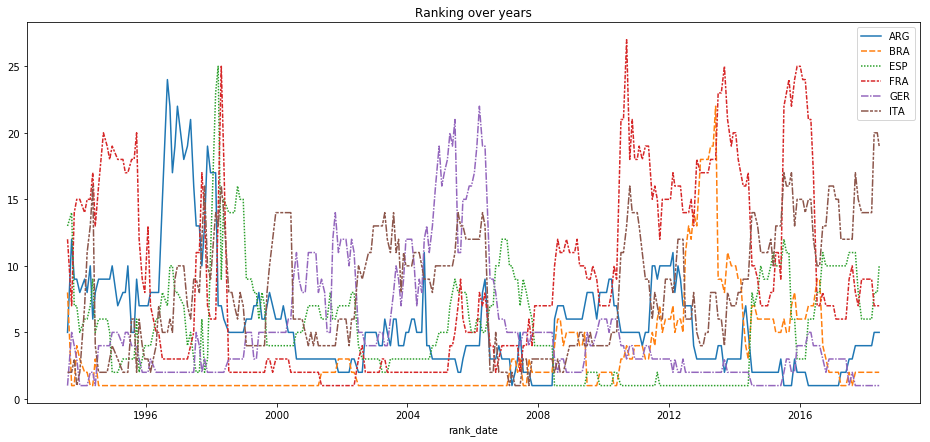

In [0]:
plt.figure(figsize=(16,7), )
sns.lineplot(data=data_fifa)
plt.title('Ranking over years')

# Manage Los Angeles museums (lineplots)


## Review 

*   You have recently been hired to manage the museums in the City of Los Angeles.  
Your first project focuses on the four museums pictured in the images below.
   ![alt text](https://i.imgur.com/pFYL8J1.png)
*   You will leverage data from the Los Angeles [Data Portal](https://data.lacity.org/) that tracks monthly visitors to each museum.  

![ex1_xlsx](https://i.imgur.com/mGWYlym.png)

## Data

In [0]:
museums_filepath = "/content/drive/My Drive/data_science_basics/data_for_data_visualization_course/museum_visitors.csv"
museum_data = pd.read_csv(museums_filepath, index_col='Date', parse_dates=True)
museum_data.tail()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2018-07-01,23136,4191,2620,4718
2018-08-01,20815,4866,2409,3891
2018-09-01,21020,4956,2146,3180
2018-10-01,19280,4622,2364,3775
2018-11-01,17163,4082,2385,4562


### Questions

*   Fill in the line below: How many visitors did the Chinese American Museum  receive in July 2018?
    * 2620
*   Fill in the line below: In October 2018, how many more visitors did Avila Adobe receive than the Firehouse Museum?
    * 14658






In [0]:
display(museum_data['Avila Adobe'].loc['2018-10-01'] - museum_data['Firehouse Museum'].loc['2018-10-01'])


14658

## Problem - Convince the museum board 

The Firehouse Museum claims they ran an event in 2014 that brought an incredible number of visitors, and that they should get extra budget to run a similar event again.  The other museums think these types of events aren't that important, and budgets should be split purely based on recent visitors on an average day.  

*  To show the museum board how the event compared to regular traffic at each museum, create a line chart that shows how the number of visitors to each museum evolved over time.  Your figure should have four lines (one for each museum).


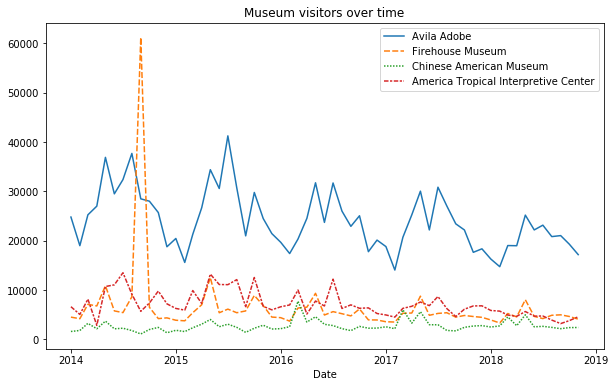

In [0]:
plt.figure(figsize=(10,6))
sns.lineplot(data=museum_data)
plt.title('Museum visitors over time')
plt.show()

## Proble - Assess seasonality
When meeting with the employees at Avila Adobe, you hear that one major pain point is that the number of museum visitors varies greatly with the seasons, with low seasons (when the employees are perfectly staffed and happy) and also high seasons (when the employees are understaffed and stressed).  You realize that if you can predict these high and low seasons, you can plan ahead to hire some additional seasonal employees to help out with the extra work.
* Create a line chart that shows how the number of visitors to Avila Adobe has evolved over time.

In [0]:
list(museum_data.columns)

['Avila Adobe',
 'Firehouse Museum',
 'Chinese American Museum',
 'America Tropical Interpretive Center']

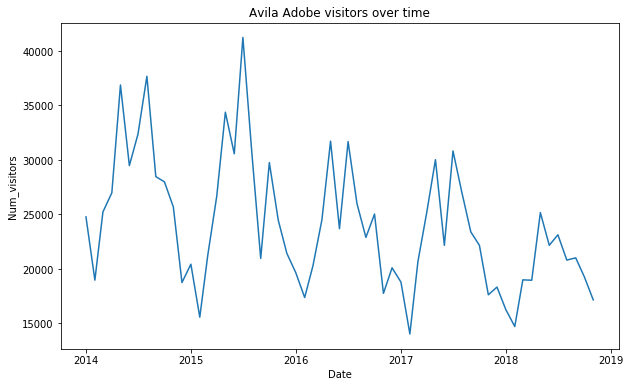

In [0]:
plt.figure(figsize=(10,6))
sns.lineplot(data=museum_data['Avila Adobe'], )
plt.xlabel('Date')
plt.ylabel('Num_visitors')
plt.title('Avila Adobe visitors over time')
plt.show()

### Questions

1.   Does Avila Adobe get more visitors:
- in September-February (in LA, the fall and winter months), or 
- **in March-August (in LA, the spring and summer)?**  
2.   Using this information, when should the museum staff additional seasonal employees?
- **During spring-autumn**



# Flight delays (barplots, heatmaps)
we'll work with a dataset from the US Department of Transportation that tracks flight delays

## Data

In [0]:
flight_filepath = working_path + 'flight_delays.csv'
flight_data = pd.read_csv(flight_filepath, index_col='Month')
flight_data

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260


## Visualize American Airlines average delays (code AA)

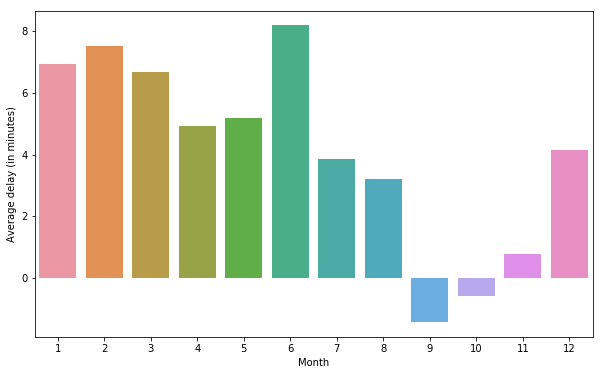

In [0]:
plt.figure(figsize=(10,6))
sns.barplot(x=flight_data.index, y=flight_data['AA'])
plt.ylabel('Average delay (in minutes)')
plt.show()


## Heatmap
It possible to notice that most of the airlines have more dark month areas in heatmap durin months 9-11.  
It means that they tend to do flights on schedule more and this may lead to other assumptions, to more analysis.

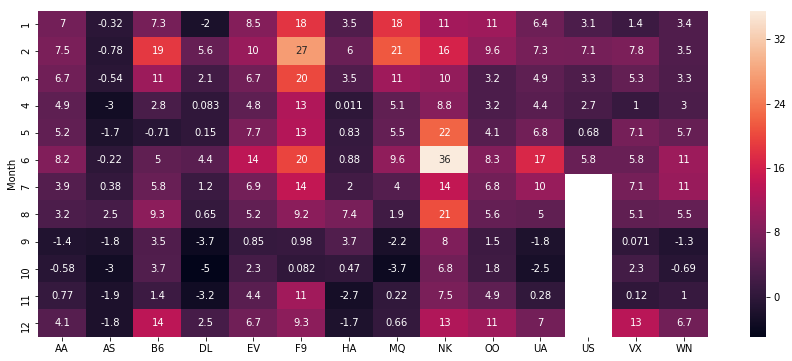

In [0]:
plt.figure(figsize=(15,6))
sns.heatmap(data=flight_data, annot=True)
plt.show()

# Video games review (barplots, heatmaps)

## Introduction

You've recently decided to create your very own video game!  As an avid reader of [IGN Game Reviews](https://www.ign.com/reviews/games), you hear about all of the most recent game releases, along with the ranking they've received from experts, ranging from 0 (_Disaster_) to 10 (_Masterpiece_).

![ex2_ign](https://i.imgur.com/Oh06Fu1.png)

You're interested in using [IGN reviews](https://www.ign.com/reviews/games) to guide the design of your upcoming game.  Thankfully, someone has summarized the rankings in a really useful CSV file that you can use to guide your analysis.


## Data

In [0]:
ign_filepath = working_path + 'ign_scores.csv'
ign_data = pd.read_csv(ign_filepath, index_col='Platform')
ign_data

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000
Nintendo 64,6.649057,8.250000,7.000000,5.681250,6.889655,7.461538,6.050000,6.939623,8.042857,5.675000,6.967857,6.900000
Nintendo DS,5.903608,7.240000,6.259804,6.320000,6.840000,6.604615,7.222619,6.038636,6.965217,5.874359,5.936667,6.644737
Nintendo DSi,6.827027,8.500000,6.090909,7.500000,7.250000,6.810526,7.166667,6.563636,6.500000,5.195652,5.644444,6.566667
PC,6.805791,7.334746,7.136798,7.166667,7.410938,6.924706,7.759930,7.032418,7.084878,7.104889,6.902424,7.310207


### Questions



1.  Fill in the line below: What is the highest average score received by PC games, for any platform?
    * 7.759930
2.  Fill in the line below: On the Playstation Vita platform, which genre has the  
 lowest average score? 
    * Simulation

## Which platform is best?
Since you can remember, your favorite video game has been [**Mario Kart Wii**](https://www.ign.com/games/mario-kart-wii), a racing game released for the Wii platform in 2008.  And, IGN agrees with you that it is a great game -- their rating for this game is a whopping 8.9!  Inspired by the success of this game, you're considering creating your very own racing game for the Wii platform.


*   Create a bar chart that shows the average score for **racing** games, for each platform.  Your chart should have one bar for each platform.



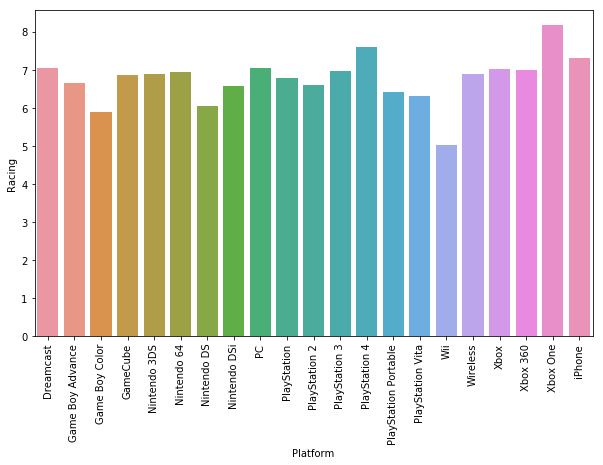

In [0]:
plt.figure(figsize=(10,6))
sns.barplot(x=ign_data.index, y=ign_data['Racing'])
plt.xticks(rotation='vertical')
plt.show()

### Question

Based on the bar chart, do you expect a racing game for the **Wii** platform to receive a high rating?  If not, what gaming platform seems to be the best alternative?
- **No, Wii has lowest average scoring. Best alternative would be Xbox One with highest average scoring.**

## All possible combinations!

Eventually, you decide against creating a racing game for Wii, but you're still committed to creating your own video game!  Since your gaming interests are pretty broad (_... you generally love most video games_), you decide to use the IGN data to inform your new choice of genre and platform.

*   Use the data to create a heatmap of average score by genre and platform.



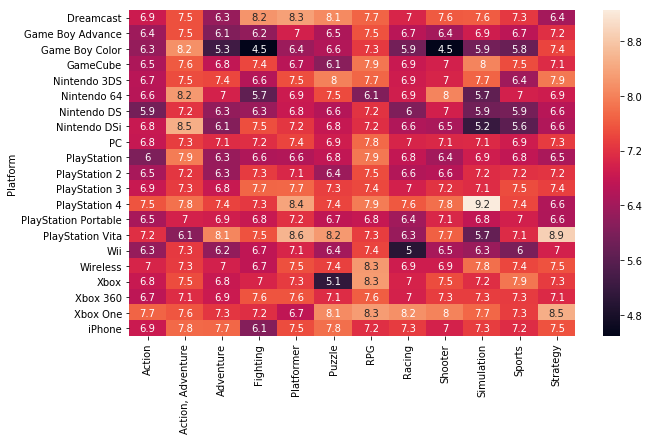

In [0]:
plt.figure(figsize=(10,6))
sns.heatmap(data=ign_data, annot=True)
plt.show()

### Question

Which combination of genre and platform receives the highest average ratings?  Which combination receives the lowest average rankings?

*   Highest: Play Station 4 with Simulation
*   Lowest: Game Boy Advance with Fighting and Shooter



# Insurance (scatter plots)
We'll work with a (synthetic) dataset of insurance charges, to see if we can understand why some customers pay more than others.

## Data

In [0]:
insurance_filepath = working_path + 'insurance.csv'
insurance_data = pd.read_csv(insurance_filepath)
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Columns - age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

## Scatter plot
Lets plot how body mass index correlates with charges

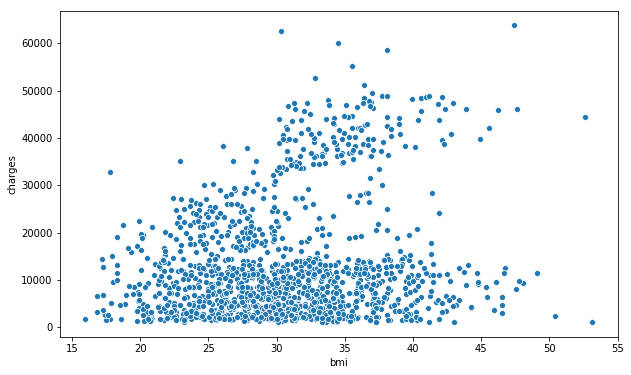

In [0]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])
plt.show()

As we can see amount of charges somehow correlates with bmi. People with higher bmi tend to pay more  
for insurance and its quite logical (higher bmi may typically indicates higher risk of chronic desieses).  
But how strongly it correlates and even do it really correlates? We can check it by plotting regression line -  
line which fits best with the data.

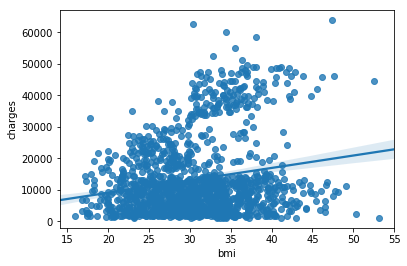

In [0]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])
plt.show()

## Color-coded scatter plots

*   We can use scatter plots to display the relationships between (not two, but...) three variables! One way of doing this is by color-coding the points.
*   For instance, to understand how smoking affects the relationship between BMI and insurance costs, we can color-code the points by 'smoker', and plot the other two columns ('bmi', 'charges') on the axes.


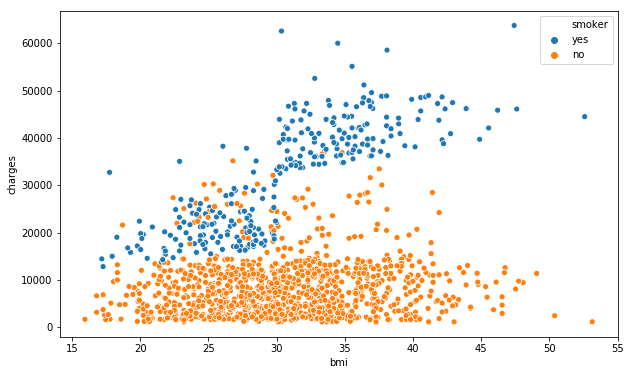

In [0]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])
plt.show()

As we can see while induviduals tends to pay a bit more when bmi increase, smokers tend to pay way more when bmi increases.  
But how strongly more? For this we can add regression lines for both smokers and non smokers.  
Lets do it!

<Figure size 720x432 with 0 Axes>

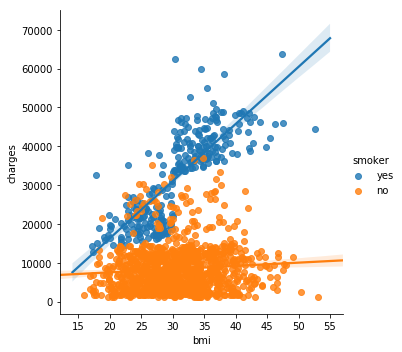

In [0]:
plt.figure(figsize=(10,6))
sns.lmplot(data=insurance_data, x='bmi', y='charges', hue='smoker')
plt.show()

As we can see regression line for smokers for bmi and charges correlation is way more steaper than non-smokers.  
It says that charges for smokers increases way more faster while increasing bmi.

## Scatter plots for categorical data
We'll refer to this plot type as a categorical scatter plot, and we build it with the sns.swarmplot command.

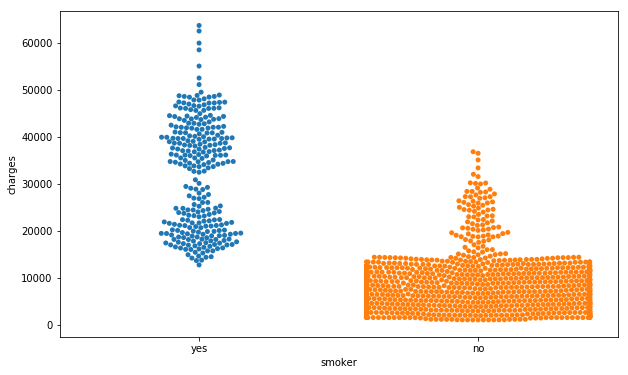

In [0]:
plt.figure(figsize=(10,6))
sns.swarmplot(x=insurance_data['smoker'], y=insurance_data['charges'])
plt.show()

What do this swarmplot() shows to us?

*   In average smokers pays more for insurance generally
*   Individuals who pays most are smokers, individuals who pays least are non-smokers



# Candy producer (scatter plots)
You work for a major candy producer, and your goal is to write a report that your company can use to guide the design of its next product.  Soon after starting your research, you stumble across this [very interesting dataset](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) containing results from a fun survey to crowdsource favorite candies.

## Data

In [0]:
candy_filepath = working_path + 'candy.csv'
candy_data = pd.read_csv(candy_filepath, index_col='id')
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


The dataset contains 83 rows, where each corresponds to a different candy bar.  There are 13 columns:
- `'competitorname'` contains the name of the candy bar. 
- the next **9** columns (from `'chocolate'` to `'pluribus'`) describe the candy.  For instance, rows with chocolate candies have `"Yes"` in the `'chocolate'` column (and candies without chocolate have `"No"` in the same column).
- `'sugarpercent'` provides some indication of the amount of sugar, where higher values signify higher sugar content.
- `'pricepercent'` shows the price per unit, relative to the other candies in the dataset.
- `'winpercent'` is calculated from the survey results; higher values indicate that the candy was more popular with survey respondents.

### Questions



1.   Fill in the line below: Which candy was more popular with survey respondents: '3 Musketeers' or 'Almond Joy'?
    * 3 Musketeers
2.   Fill in the line below: Which candy has higher sugar content: 'Air Heads' or 'Baby Ruth'?
    * 'Air Heads



## The role of sugar
*   Do people tend to prefer candies with higher sugar content?
*   Create a scatter plot that shows the relationship between `'sugarpercent'` (on the horizontal x-axis)  
and `'winpercent'` (on the vertical y-axis).



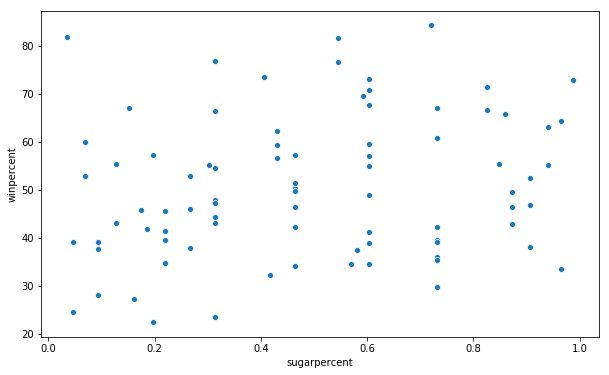

In [0]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])
plt.show()

### Question

Does the scatter plot show a **strong** correlation between the two variables?  If so, are candies with more sugar relatively more or less popular with the survey respondents?

-   **No. It shows really small correlation so it tells that sugar do not play very important role for winning rate.**


## Take a closer look
Create the same scatter plot you just created but now with a regression line!

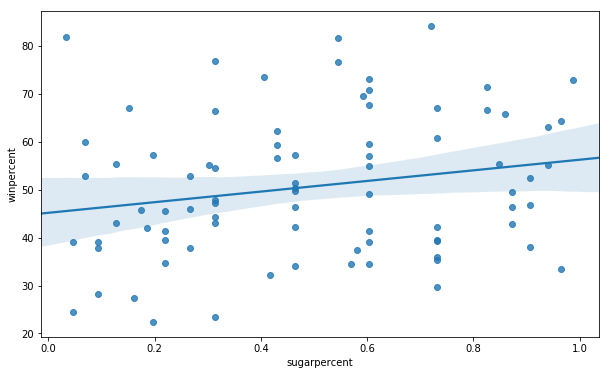

In [0]:
plt.figure(figsize=(10,6))
sns.regplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])
plt.show()

### Question

According to the plot above, is there a **slight** correlation between `'winpercent'` and `'sugarpercent'`?  What does this tell you about the candy that people tend to prefer?

*  Yes, there is a slight correlation. It tells that people tend to prefer candies with more sugar in it.



## Chocolate!
In the code cell below, create a scatter plot to show the relationship between `'pricepercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis). Use the `'chocolate'` column to color-code the points

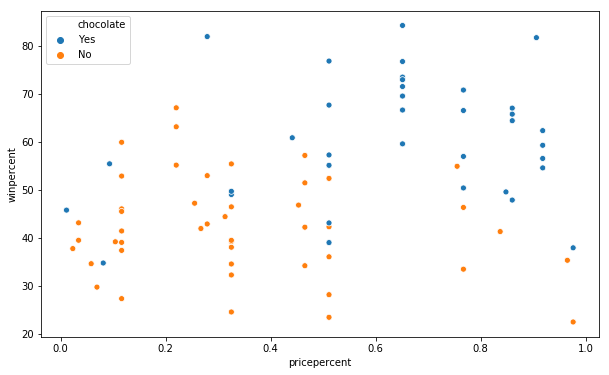

In [0]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data['chocolate'])
plt.show()

Can you see any interesting patterns in the scatter plot?  We'll investigate this plot further  by adding regression lines in the next step!

*   It seams that winpercent is increasing while pricepercent increases for chocolate candies but wipercent decreases for non-chocolate candies



## Investigate chocolate
Create the same scatter plot you have just created, but now with two regression lines, corresponding to (1) chocolate candies and (2) candies without chocolate.

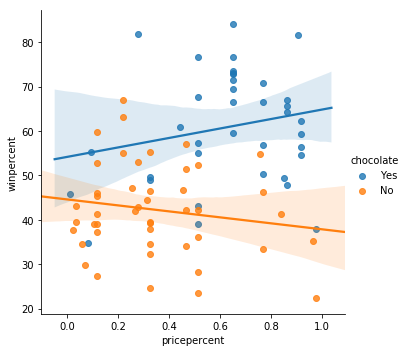

In [0]:
sns.lmplot(data=candy_data, x='pricepercent', y='winpercent', hue='chocolate')
plt.show()

### Question

Using the regression lines, what conclusions can you draw about the effects of chocolate and price on candy popularity?

*   For chocolate candies while pricepercent increases winpercent increases as well
*   For non-chocolate candies while pricepercent increases winpercent decreases



## Everybody loves chocolate.
Create a categorical scatter plot to highlight the relationship between `'chocolate'` and `'winpercent'`.  Put `'chocolate'` on the (horizontal) x-axis, and `'winpercent'` on the (vertical) y-axis. 

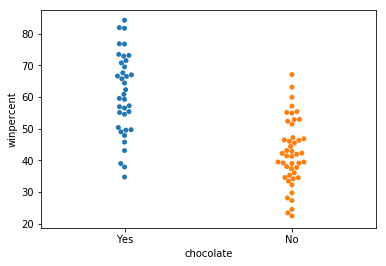

In [0]:
sns.swarmplot(x=candy_data['chocolate'], y=candy_data['winpercent'])
plt.show()

### Question

You decide to dedicate a section of your report to the fact that chocolate candies tend to be more popular than candies without chocolate.  Which plot is more appropriate to tell this story: the plot with regression lines, or the plot of categorical data we've plotted recently?

-   **Categorical data scatter plot is more informative to tell that chocolate candies tend to be more popular in general, because it clearly shows that in average winpercent is higher for that category - scatters are higher.**

-   **While both plots tell the desired story, the plot with regression lines conveys far more information that could distract from the main point.**

# Flowers (histograms and density plots)
We'll work with a dataset of 150 different flowers, or 50 each from three different species of iris (Iris setosa, Iris versicolor, and Iris virginica).

## Data

In [0]:
iris_filepath = working_path + 'iris.csv'
iris_data = pd.read_csv(iris_filepath, index_col='Id')
display(iris_data.head())
print('Unique species are: ', iris_data.Species.unique())

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Unique species are:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Histogram
Say we would like to create a histogram to see how petal length varies in iris flowers. We can do this with the sns.distplot command.

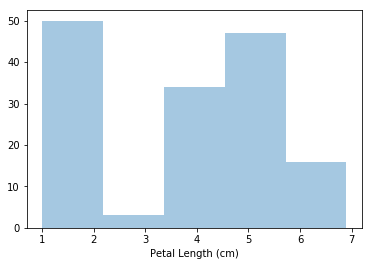

In [0]:
sns.distplot(a=iris_data['Petal Length (cm)'], kde=False)
plt.show()

We customize the behavior of the command with two additional pieces of information:

*  a= chooses the column we'd like to plot (in this case, we chose 'Petal Length (cm)').
*  kde=False is something we'll always provide when creating a histogram,  
as leaving it out will create a slightly different plot - plots gaussian curve on top on histogram

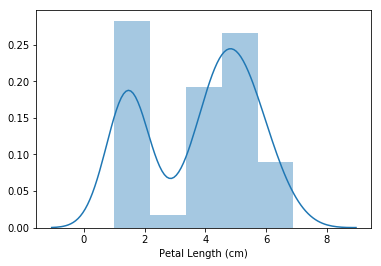

In [0]:
sns.distplot(a=iris_data['Petal Length (cm)'], kde=True)
plt.show()

## Density plot
*  The next type of plot is a kernel density estimate (KDE) plot.  
Its like a smoothed histogram or histogram not with the bars but with the gaussian fit.
*  To make a KDE plot, we use the sns.kdeplot command. Setting shade=True colors the area below the curve.


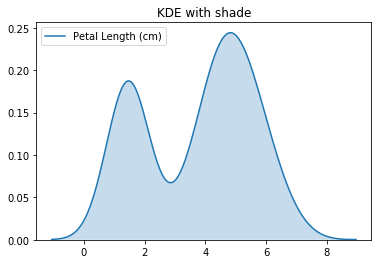

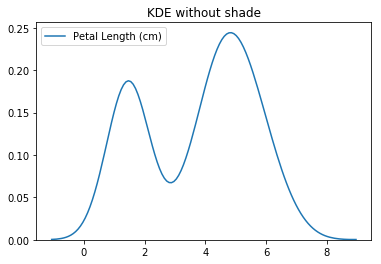

In [0]:
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)
plt.title('KDE with shade')
plt.show()
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=False)
plt.title('KDE without shade')
plt.show()

## 2D KDE plots
We're not restricted to a single column when creating a KDE plot.  
We can create a two-dimensional (2D) KDE plot with the **sns.jointplot** command.

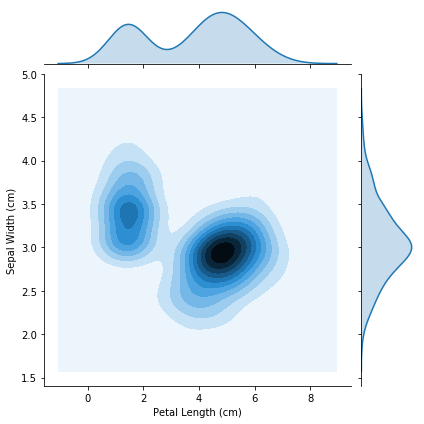

In [0]:
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind='kde')
plt.show()

The color-coding shows us how likely we are to see different combinations of sepal width and petal length, where darker parts of the figure are more likely.

## Color-coded plots
We'll create plots to understand differences between the species.  
To accomplish this, we begin by breaking the dataset into three separate files, with one for each species.  
Alse we can select each species data straight from whole dataframe.

### From 3 dataframes

In [0]:
iris_set_filepath = working_path + "iris_setosa.csv"
iris_ver_filepath = working_path + "iris_versicolor.csv"
iris_vir_filepath = working_path + "iris_virginica.csv"

iris_set_data = pd.read_csv(iris_set_filepath, index_col="Id")
iris_ver_data = pd.read_csv(iris_ver_filepath, index_col="Id")
iris_vir_data = pd.read_csv(iris_vir_filepath, index_col="Id")

iris_ver_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
51,7.0,3.2,4.7,1.4,Iris-versicolor
52,6.4,3.2,4.5,1.5,Iris-versicolor
53,6.9,3.1,4.9,1.5,Iris-versicolor
54,5.5,2.3,4.0,1.3,Iris-versicolor
55,6.5,2.8,4.6,1.5,Iris-versicolor


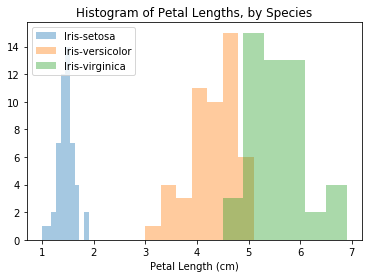

In [0]:
# Histograms for each species
sns.distplot(a=iris_set_data['Petal Length (cm)'], label="Iris-setosa", kde=False)
sns.distplot(a=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", kde=False)
sns.distplot(a=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", kde=False)

plt.title("Histogram of Petal Lengths, by Species")
plt.legend()
plt.show()

### From 1 dataframe

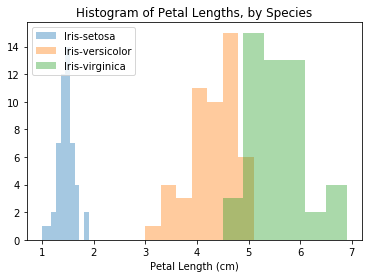

In [0]:
sns.distplot(a=iris_data.loc[iris_data['Species']=='Iris-setosa']['Petal Length (cm)'], label='Iris-setosa', kde=False)
sns.distplot(a=iris_data.loc[iris_data['Species']=='Iris-versicolor']['Petal Length (cm)'], label='Iris-versicolor', kde=False)
sns.distplot(a=iris_data.loc[iris_data['Species']=='Iris-virginica']['Petal Length (cm)'], label='Iris-virginica', kde=False)

plt.legend()
plt.title('Histogram of Petal Lengths, by Species')
plt.show()

### KDE for each specie
We can also create a KDE plot for each species by using sns.kdeplot (as above).  

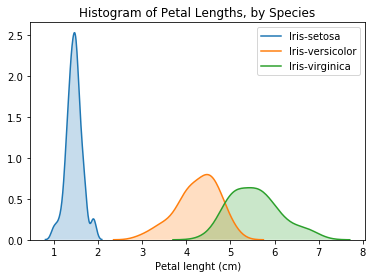

In [0]:
sns.kdeplot(data=iris_data.loc[iris_data['Species']=='Iris-setosa']['Petal Length (cm)'], label='Iris-setosa', shade=True)
sns.kdeplot(data=iris_data.loc[iris_data['Species']=='Iris-versicolor']['Petal Length (cm)'], label='Iris-versicolor', shade=True)
sns.kdeplot(data=iris_data.loc[iris_data['Species']=='Iris-virginica']['Petal Length (cm)'], label='Iris-virginica', shade=True)

plt.legend()
plt.xlabel('Petal lenght (cm)')
plt.title('Histogram of Petal Lengths, by Species')
plt.show()

We can notice interesting pattern drom this plot - these three Iris species distributes into two groups, where Iris-versicolor and Iris-virginica tends to have similar Petal lenght while Iris-setosa belongs to a category by itself. Also it tells us that even looking at this graph we can abstractly categorize these flower species - if we have petal lenght less tha ~2.5 its most likely to be Iris-setosa.

# Breast cancer tumors (histograms and density plots)

## Short review

You'll work with a real-world dataset containing information collected from microscopic images of breast cancer tumors, similar to the image below.

![ex4_cancer_image](https://i.imgur.com/qUESsJe.png)

Each tumor has been labeled as either [**benign**](https://en.wikipedia.org/wiki/Benign_tumor) (_noncancerous_) or **malignant** (_cancerous_).

To learn more about how this kind of data is used to create intelligent algorithms to classify tumors in medical settings, **watch the short video [at this link](https://www.youtube.com/watch?v=9Mz84cwVmS0)**!

## Data
Two datasets with contains benign and malign cancer tumours.

In [0]:
cancer_b_filepath = working_path + 'cancer_b.csv'
cancer_m_filepath = working_path + 'cancer_m.csv'

cancer_b_data = pd.read_csv(cancer_b_filepath, index_col='Id')
cancer_m_data = pd.read_csv(cancer_m_filepath, index_col='Id')

print('\n Benign tumours')
display(cancer_b_data.head())
print('\n Malign tumours')
display(cancer_m_data.head())


 Benign tumours


,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),Radius (se),Texture (se),Perimeter (se),Area (se),Smoothness (se),Compactness (se),Concavity (se),Concave points (se),Symmetry (se),Fractal dimension (se),Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409



 Malign tumours


,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),Radius (se),Texture (se),Perimeter (se),Area (se),Smoothness (se),Compactness (se),Concavity (se),Concave points (se),Symmetry (se),Fractal dimension (se),Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In the datasets, each row corresponds to a different image.  Each dataset has 31 different columns, corresponding to:
* 1 column (`'Diagnosis'`) that classifies tumors as either benign (which appears in the dataset as **B**) or malignant (**M**), and
* 30 columns containing different measurements collected from the images.


### Questions



1.   Fill in the line below: In the first five rows of the data for benign tumors, what is the largest value for 'Perimeter (mean)'?
    * 87.46
2.   Fill in the line below: What is the value for 'Radius (mean)' for the tumor with Id 842517?
    * 20.57



## Investigating differences
Create two histograms that show the distribution in values for `'Area (mean)'` for both benign and malignant tumors

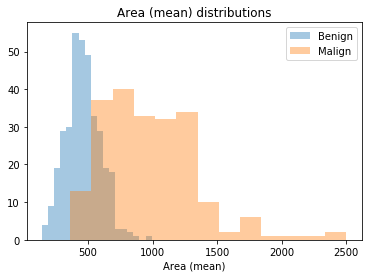

In [0]:
sns.distplot(a=cancer_b_data['Area (mean)'], kde=False, label='Benign')
sns.distplot(a=cancer_m_data['Area (mean)'], kde=False, label='Malign')
plt.title('Area (mean) distributions')
plt.legend()
plt.show()

### Question

A researcher approaches you for help with identifying how the `'Area (mean)'` column can be used to understand the difference between benign and malignant tumors.  Based on the histograms above:

1.   Do malignant tumors have higher or lower values for `'Area (mean)'` (relative to benign tumors), on average?
    * Higher
2.   Which tumor type seems to have a larger range of potential values?
    * Malign because it distributes much wider in Area (mean)





## A very useful column
Use the code cell below to create two KDE plots that show the distribution in values for `'Radius (worst)'` for both benign and malignant tumors.

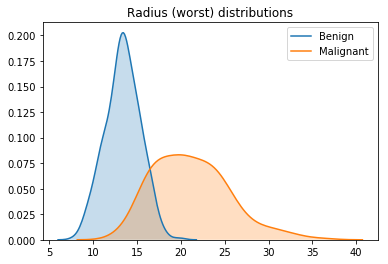

In [57]:
sns.kdeplot(data=cancer_b_data['Radius (worst)'], shade=True, label='Benign')
sns.kdeplot(data=cancer_m_data['Radius (worst)'], shade=True, label='Malignant')
plt.legend()
plt.title('Radius (worst) distributions')
plt.show()

### Question

A hospital has recently started using an algorithm that can diagnose tumors with high accuracy.  
Given a tumor with a value for `'Radius (worst)'` of 25, do you think the algorithm is more likely to classify the tumor as benign or malignant?
    * Malignant

# Plots summary

Since it's not always easy to decide how to best tell the story behind your data, we've broken the chart types into three broad categories to help with this.
* Trends - A trend is defined as a pattern of change.
    * sns.lineplot - Line charts are best to show trends over a period of time, and multiple lines can be used to show trends in more than one group.
* Relationship - There are many different chart types that you can use to understand relationships between variables in your data.
    * sns.barplot - Bar charts are useful for comparing quantities corresponding to different groups
    * sns.heatmap - Heatmaps can be used to find color-coded patterns in tables of numbers
    * sns.scatterplot - Scatter plots show the relationship between two continuous variables; if color-coded, we can also show the relationship with a third categorical variable
    * sns.regplot - Including a regression line in the scatter plot makes it easier to see any linear relationship between two variables
    * sns.lmplot - This command is useful for drawing multiple regression lines, if the scatter plot contains multiple, color-coded groups
    * sns.swarmplot - Categorical scatter plots show the relationship between a continuous variable and a categorical variable
* Distribution - We visualize distributions to show the possible values that we can expect to see in a variable, along with how likely they are.
    * sns.distplot - Histograms show the distribution of a single numerical variable
    * sns.kdeplot - KDE plots (or 2D KDE plots) show an estimated, smooth distribution of a single numerical variable (or two numerical variables)
    * sns.jointplot - This command is useful for simultaneously displaying a 2D KDE plot with the corresponding KDE plots for each individual variable
    

# Spotify (Plot styles)

## Data

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


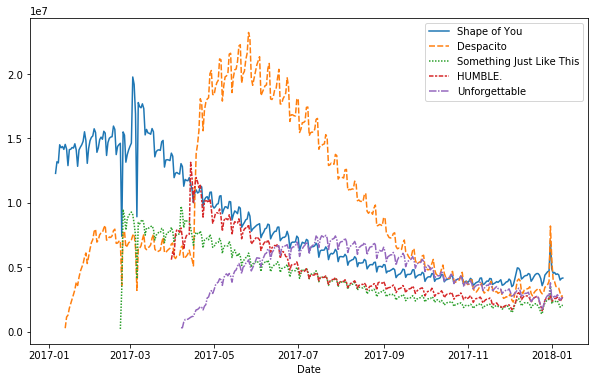

In [63]:
spotify_filepath = working_path + 'spotify.csv'
spotify_data = pd.read_csv(spotify_filepath, index_col='Date', parse_dates=True)
display(spotify_data.head())

plt.figure(figsize=(10,6))
sns.lineplot(data=spotify_data)
plt.show()

## Styles/themes

Seaborn has five different themes: (1)"darkgrid", (2)"whitegrid", (3)"dark", (4)"white", and (5)"ticks".


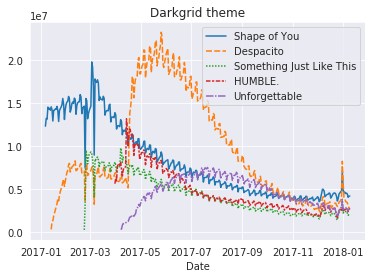

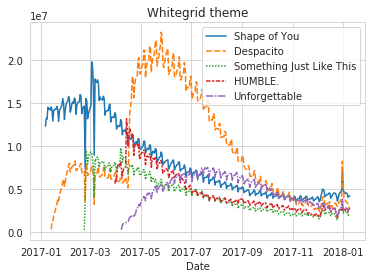

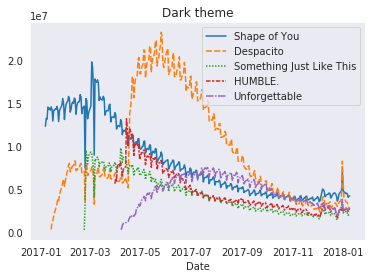

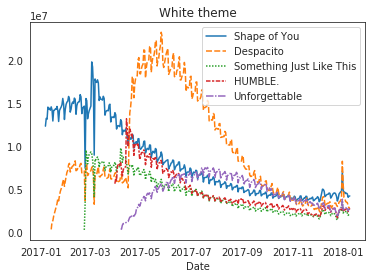

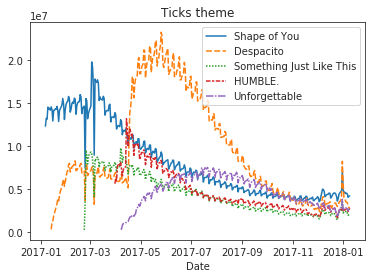

In [72]:
# sns.set_style('dark')
# sns.lineplot(data=spotify_data)
# plt.show()

styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
for i in styles:
  sns.set_style(i)
  sns.lineplot(data=spotify_data)
  plt.title(i.capitalize() + ' theme')
  plt.show()

# ATP tennis

## Data

In [94]:
atp_filepath = working_path + 'ATP.csv'
atp_data = pd.read_csv(atp_filepath, index_col='tourney_date', parse_dates=True)
display(atp_data.tail())
print('\n Column names: ', atp_data.columns)

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,l_svpt,loser_age,loser_entry,loser_hand,loser_ht,loser_id,loser_ioc,loser_name,loser_rank,loser_rank_points,loser_seed,match_num,minutes,round,score,surface,tourney_id,tourney_level,tourney_name,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_ace,w_bpFaced,w_bpSaved,w_df,w_svpt,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
tourney_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-25,3,NaN,54.0,43.0,16.0,15.0,13.0,5.0,3.0,1.0,83.0,31.78,NaN,R,188.0,104919,ARG,Leonardo Mayer,55.0,895.0,4.0,296,107.0,QF,4-6 6-4 6-4,Clay,2019-0533,A,Sao Paulo,54.0,43.0,20.0,15.0,8.0,6.0,5.0,2.0,92.0,22.74,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN
2019-02-25,3,NaN,23.0,12.0,5.0,7.0,0.0,8.0,3.0,2.0,40.0,25.69,NaN,R,NaN,106198,BOL,Hugo Dellien,95.0,600.0,NaN,297,53.0,QF,6-1 6-1,Clay,2019-0533,A,Sao Paulo,27.0,21.0,8.0,7.0,3.0,0.0,0.0,1.0,40.0,20.18,NaN,R,NaN,134770,NOR,Casper Ruud,108.0,527.0,NaN
2019-02-25,3,NaN,56.0,39.0,13.0,12.0,5.0,5.0,3.0,1.0,80.0,23.73,NaN,R,NaN,111513,SRB,Laslo Djere,37.0,1127.0,NaN,298,109.0,SF,7-6(10) 7-6(1),Clay,2019-0533,A,Sao Paulo,48.0,36.0,19.0,12.0,5.0,2.0,0.0,1.0,76.0,28.78,NaN,L,185.0,105550,ARG,Guido Pella,48.0,975.0,3.0
2019-02-25,3,NaN,34.0,24.0,11.0,10.0,5.0,6.0,3.0,0.0,57.0,20.18,NaN,R,NaN,134770,NOR,Casper Ruud,108.0,527.0,NaN,299,79.0,SF,6-4 6-4,Clay,2019-0533,A,Sao Paulo,31.0,23.0,16.0,10.0,1.0,3.0,2.0,3.0,57.0,22.74,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN
2019-02-25,3,NaN,35.0,26.0,9.0,11.0,5.0,7.0,3.0,4.0,65.0,22.74,NaN,R,NaN,106426,CHI,Christian Garin,92.0,620.0,NaN,300,83.0,F,7-5 6-3,Clay,2019-0533,A,Sao Paulo,49.0,36.0,9.0,10.0,8.0,7.0,6.0,2.0,65.0,28.78,NaN,L,185.0,105550,ARG,Guido Pella,48.0,975.0,3.0



 Column names:  Index(['best_of', 'draw_size', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_ace', 'l_bpFaced', 'l_bpSaved', 'l_df', 'l_svpt', 'loser_age',
       'loser_entry', 'loser_hand', 'loser_ht', 'loser_id', 'loser_ioc',
       'loser_name', 'loser_rank', 'loser_rank_points', 'loser_seed',
       'match_num', 'minutes', 'round', 'score', 'surface', 'tourney_id',
       'tourney_level', 'tourney_name', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_ace', 'w_bpFaced', 'w_bpSaved', 'w_df', 'w_svpt',
       'winner_age', 'winner_entry', 'winner_hand', 'winner_ht', 'winner_id',
       'winner_ioc', 'winner_name', 'winner_rank', 'winner_rank_points',
       'winner_seed'],
      dtype='object')


In [106]:
atp_df = atp_data[['loser_age', 'loser_hand', 'loser_ioc', 'loser_name', 'loser_rank', 'surface', 'tourney_name', 'winner_age', 'winner_hand', 'winner_ioc', 'winner_name', 'winner_rank']]
atp_df.tail()

,loser_age,loser_hand,loser_ioc,loser_name,loser_rank,surface,tourney_name,winner_age,winner_hand,winner_ioc,winner_name,winner_rank
tourney_date,,,,,,,,,,,,
2019-02-25,31.78,R,ARG,Leonardo Mayer,55.0,Clay,Sao Paulo,22.74,R,CHI,Christian Garin,92.0
2019-02-25,25.69,R,BOL,Hugo Dellien,95.0,Clay,Sao Paulo,20.18,R,NOR,Casper Ruud,108.0
2019-02-25,23.73,R,SRB,Laslo Djere,37.0,Clay,Sao Paulo,28.78,L,ARG,Guido Pella,48.0
2019-02-25,20.18,R,NOR,Casper Ruud,108.0,Clay,Sao Paulo,22.74,R,CHI,Christian Garin,92.0
2019-02-25,22.74,R,CHI,Christian Garin,92.0,Clay,Sao Paulo,28.78,L,ARG,Guido Pella,48.0


In [0]:
atp_df = atp_df.dropna()

## Plots

### Winner and loser ages distribution

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


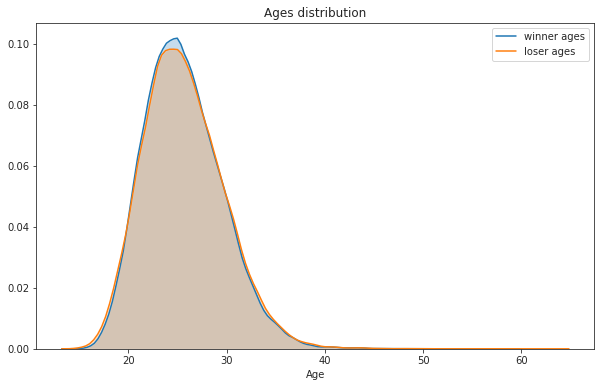

In [114]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=atp_df['winner_age'], label='winner ages', shade=True)
sns.kdeplot(data=atp_df['loser_age'], label='loser ages', shade=True)
plt.xlabel('Age')
plt.legend()
plt.title('Ages distribution')
plt.show()

### Winner and loser ranks distribution

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


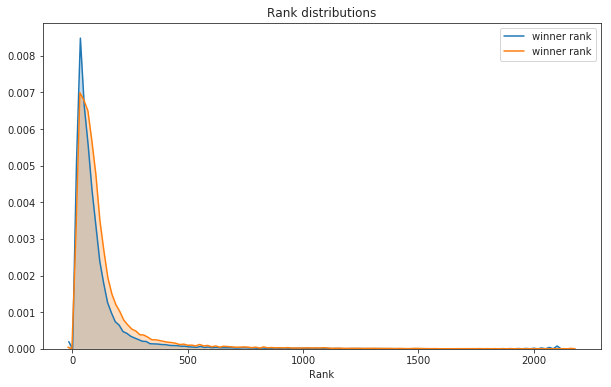

In [115]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=atp_df['winner_rank'], label='winner rank', shade=True)
sns.kdeplot(data=atp_df['loser_rank'], label='winner rank', shade=True)
plt.xlabel('Rank')
plt.legend()
plt.title('Rank distributions')
plt.show()

### Winner age and rank correlation

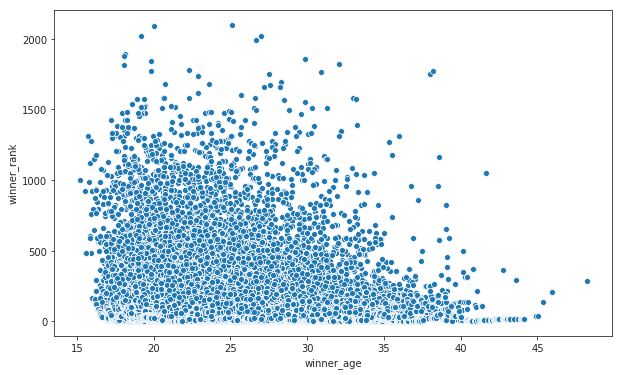

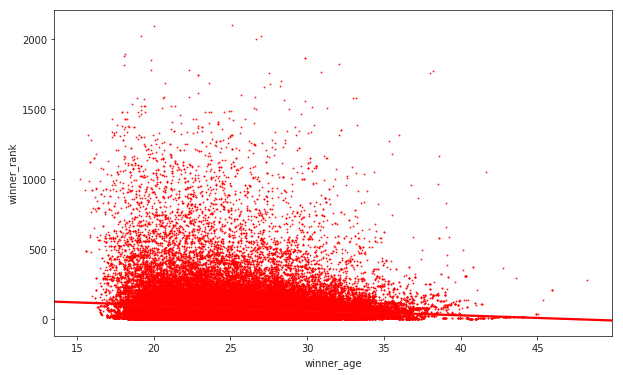

In [122]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=atp_df['winner_age'], y=atp_df['winner_rank'])
plt.show()

plt.figure(figsize=(10,6))
sns.regplot(x=atp_df['winner_age'], y=atp_df['winner_rank'], color='red', scatter_kws={'s':0.8})
plt.show()

### Loser age and rank correlation 

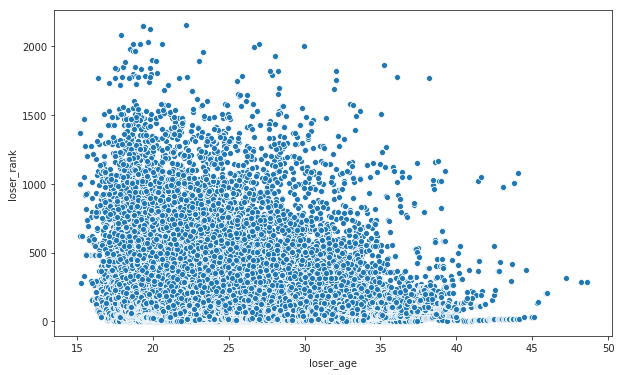

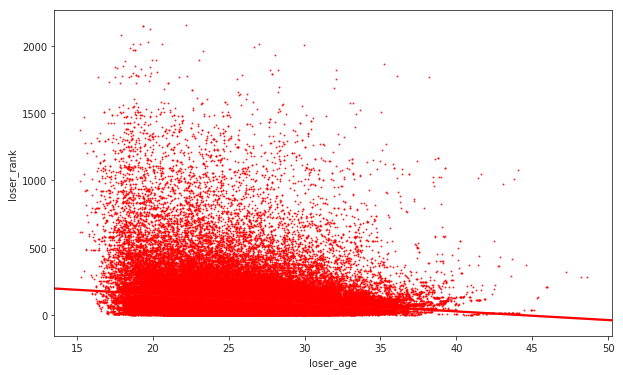

In [121]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=atp_df['loser_age'], y=atp_df['loser_rank'])
plt.show()

plt.figure(figsize=(10,6))
sns.regplot(x=atp_df['loser_age'], y=atp_df['loser_rank'], color='red', scatter_kws={'s':0.8})
plt.show()

### Winner, loser age correlation with rank and hand

<Figure size 720x432 with 0 Axes>

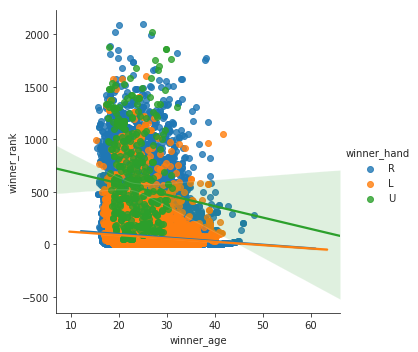

In [124]:
# Winner
plt.figure(figsize=(10,6))
sns.lmplot(data=atp_df, x='winner_age', y='winner_rank', hue='winner_hand')
plt.show()

<Figure size 720x432 with 0 Axes>

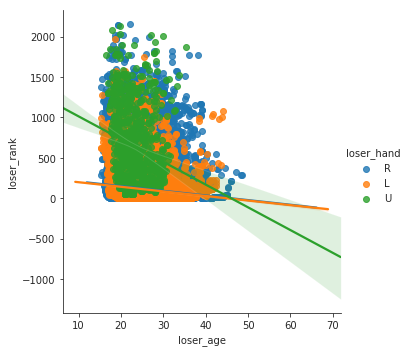

In [125]:
# Loser
plt.figure(figsize=(10,6))
sns.lmplot(data=atp_df, x='loser_age', y='loser_rank', hue='loser_hand')
plt.show()